Sprint Challenge
Data Science Sprint 13
After a sprint of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: Yelp. As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge.

Challenge Objectives
Successfully complete all these objectives to earn full credit.

Successful completion is defined as passing all the unit tests in each objective.

There are 8 total possible points in this sprint challenge.

There are more details on each objective further down in the notebook.*

Part 1: Write a function to tokenize the yelp reviews
Part 2: Create a vector representation of those tokens
Part 3: Use your tokens in a classification model on Yelp rating
Part 4: Estimate & Interpret a topic model of the Yelp reviews
Before you submit your notebook you must first
Restart your notebook's Kernel

Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)

Easiest way to do this is to click on the Cell tab at the top of your notebook and select Run All from the drop down menu.
Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).
Part 0: Import Necessary Packages
For this section, you will need to import:

spacy
Pandas
Seaborn
Matplotlib
NearestNeighbors
Pipeline
TfidfVectorizer
KneighborsClassifier
GridSearchCV
corpora
LdaModel
gensim
re
Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.

In [ ]:
# Import all required packages
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from gensim import corpora
from gensim.models import LdaModel
import gensim

In [ ]:
# Visible Testing
assert pd.__package__ == 'pandas'

Part 0: Import Data

In [ ]:
# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
df = pd.read_json(data_url, lines=True)

# Display first few rows
print(f"DataFrame shape: {df.shape}")
df.head()

DataFrame shape: (10000, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [ ]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

Part 1: Tokenize Function

Complete the function tokenize. Your function should

Accept one document at a time
Return a list of tokens
You are free to use any method you have learned this week.

TO PASS CODEGRADE RUNTIME:

Do not run your tokenize function more than one time in your notebook! It is not needed until Part 4!

In [ ]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [ ]:
def tokenize(doc):
    """
    Tokenize a document using spaCy.

    Parameters:
    -----------
    doc : str
        A single document/review text

    Returns:
    --------
    list
        A list of lemmatized tokens (lowercase, no stopwords or punctuation)
    """
    # Process the document with spaCy
    processed_doc = nlp(doc)

    # Extract tokens: lemmatize, lowercase, remove stopwords and punctuation
    tokens = [
        token.lemma_.lower()
        for token in processed_doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    return tokens

In [ ]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

Part 2: Vector Representation

Create a vector representation of the reviews (i.e. create a doc-term matrix).
Name that doc-term matrix dtm

In [ ]:
%%time
# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', max_df=0.8, min_df=5)

# Create document-term matrix
dtm = tfidf.fit_transform(df['text'])

print(f"Document-Term Matrix shape: {dtm.shape}")
print(f"Number of documents: {dtm.shape[0]}")
print(f"Number of features: {dtm.shape[1]}")

Document-Term Matrix shape: (10000, 5000)
Number of documents: 10000
Number of features: 5000
CPU times: user 1.34 s, sys: 10.1 ms, total: 1.35 s
Wall time: 2.15 s


Write a fake review. Assign the text of the review to an object called fake_review.
Query the fake review for the 10 most similar reviews, print the text of the reviews.
Given the size of the dataset, use NearestNeighbors model for this. Name the model nn.

In [ ]:
# Create and fit a NearestNeighbors model named "nn"
nn = NearestNeighbors(n_neighbors=10, metric='cosine')
nn.fit(dtm)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [ ]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [ ]:
# Create a fake review and find the 10 most similar reviews
fake_review = "This restaurant has amazing food and excellent service! The atmosphere is cozy and the staff is very friendly. I highly recommend the pasta dishes and the desserts are to die for. Will definitely come back again!"

# Transform the fake review using the same vectorizer
fake_review_vector = tfidf.transform([fake_review])

# Find the 10 nearest neighbors
distances, indices = nn.kneighbors(fake_review_vector)

print("Fake Review:")
print(fake_review)
print("\n" + "="*80 + "\n")
print("10 Most Similar Reviews:\n")

for i, idx in enumerate(indices[0]):
    print(f"\n--- Similar Review #{i+1} (Distance: {distances[0][i]:.4f}) ---")
    print(f"Stars: {df.iloc[idx]['stars']}")
    print(df.iloc[idx]['text'][:300] + "...")
    print("-" * 80)

Fake Review:
This restaurant has amazing food and excellent service! The atmosphere is cozy and the staff is very friendly. I highly recommend the pasta dishes and the desserts are to die for. Will definitely come back again!


10 Most Similar Reviews:


--- Similar Review #1 (Distance: 0.6540) ---
Stars: 4
The food is better than the OG. Nice atmosphere, good hearty pasta dishes...what's not to like?!...
--------------------------------------------------------------------------------

--- Similar Review #2 (Distance: 0.6584) ---
Stars: 5
Absolutely amazing. I highly recommend anyone trying this place they are delicious! Their staff is friendly and their atmosphere is very inviting...
--------------------------------------------------------------------------------

--- Similar Review #3 (Distance: 0.6699) ---
Stars: 5
This place has excellent service and they work as a team! Food was excellent. Highly recommend!...
-----------------------------------------------------------------------

In [ ]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

Part 3: Classification
Your goal in this section will be to predict stars from the review dataset.

Create a pipeline object with a sklearn CountVectorizer or TfidfVector and any sklearn classifier.

Use that pipeline to train a model to predict the stars feature (i.e. the labels).
Use that pipeline to predict a star rating for your fake review from Part 2.
Create a parameter dict including one parameter for the vectorizer and one parameter for the model.

Include 2 possible values for each parameter
Keep the values for each parameter low. Extreme values will compromise runtime
Use n_jobs = 1
Due to limited computational resources on CodeGrader DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.
Train the entire pipeline with a GridSearch

Name your GridSearch object as gs

In [ ]:
%%time
# Create a pipeline with TfidfVectorizer and KNeighborsClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', KNeighborsClassifier())
])

# Create parameter grid with 2 parameters, each with 2 values
param_grid = {
    'tfidf__max_features': [1000, 2000],
    'clf__n_neighbors': [3, 5]
}

# Create GridSearchCV object
gs = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    n_jobs=1,
    verbose=1
)

# Fit the model
gs.fit(df['text'], df['stars'])

print(f"\nBest parameters: {gs.best_params_}")
print(f"Best cross-validation score: {gs.best_score_:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best parameters: {'clf__n_neighbors': 5, 'tfidf__max_features': 1000}
Best cross-validation score: 0.4842
CPU times: user 22.5 s, sys: 5.67 s, total: 28.1 s
Wall time: 31.4 s


In [ ]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

Part 4: Topic Modeling
Let's find out what those yelp reviews are saying! :D

Estimate a LDA topic model of the review text
Set num_topics to 5
Name your LDA model lda
Create 1-2 visualizations of the results
You can use the most important 3 words of a topic in relevant visualizations.
In markdown, write 1-2 paragraphs of analysis on the results of your topic model
When you instantiate your LDA model, it should look like this:

lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )
Note: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

Note about pyLDAvis
pyLDAvis is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz).

1. Estimate a LDA topic model of the review text
Use the tokenize function you created earlier to create tokens.
Create an id2word object.
Create a corpus object.
Instantiate an lda model.
Hint: Use id2word.doc2bow

Hint: Use corpora.Dictionary

Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# Do not change this value
num_topics = 5

In [ ]:
# Tokenize all reviews (only run once!)
print("Tokenizing reviews...")
tokenized_reviews = [tokenize(doc) for doc in df['text']]

# Create dictionary
print("Creating dictionary...")
id2word = corpora.Dictionary(tokenized_reviews)

# Filter extremes to reduce vocabulary size
id2word.filter_extremes(no_below=5, no_above=0.5)

# Create corpus
print("Creating corpus...")
corpus = [id2word.doc2bow(doc) for doc in tokenized_reviews]

# Train LDA model
print("Training LDA model...")
lda = LdaModel(
    corpus=corpus,
    id2word=id2word,
    random_state=723812,
    num_topics=num_topics,
    passes=1
)

print("\nLDA Model trained successfully!")
print(f"Number of topics: {lda.num_topics}")
print(f"Vocabulary size: {len(id2word)}")

Tokenizing reviews...
Creating dictionary...
Creating corpus...


Training LDA model...

LDA Model trained successfully!
Number of topics: 5
Vocabulary size: 6184


Testing

In [ ]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

2. Create 2 visualizations of the results:
Create a visualization using pyLDAvis. Run the cell, then comment out your code before submission, leaving the visualization in the cell.

Create a visualization using the matplotlib library and utilizing the subplots function. Assign this visualization to a variable called visual_plot.

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.0 MB/s eta 0:00:00


In [ ]:
# UNCOMMENT TO RUN, THEN COMMENT OUT BEFORE SUBMISSION
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda, corpus, id2word)
pyLDAvis.display(vis)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

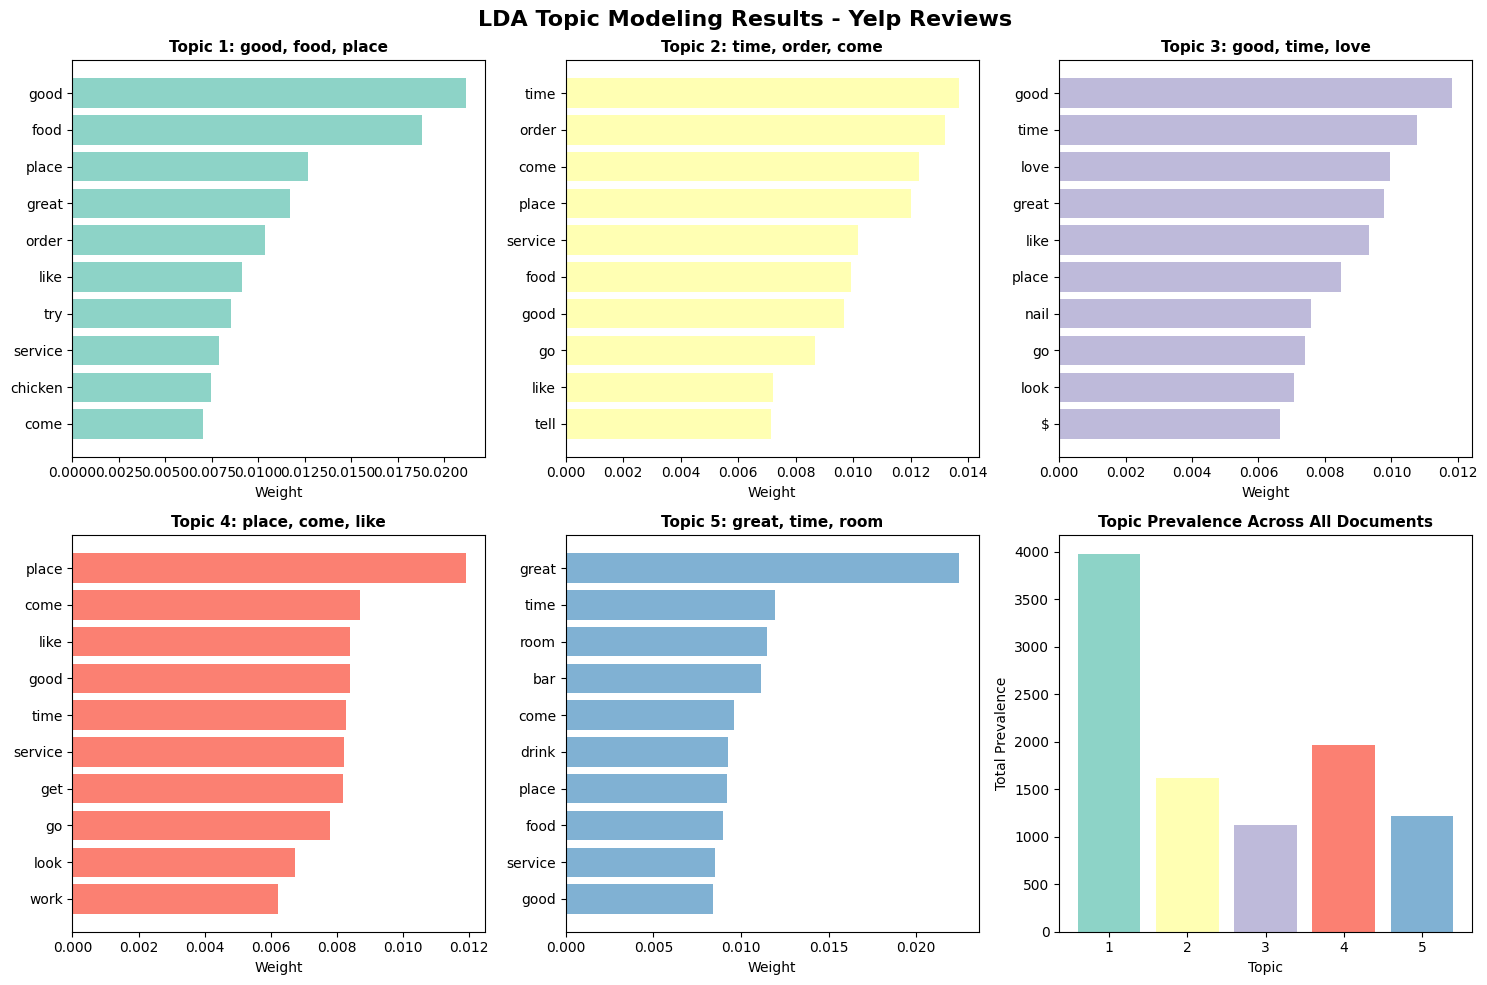

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Cell for matplotlib visualzation
# Extract top 3 words for each topic
topic_words = {}
for idx in range(num_topics):
    topic_terms = lda.show_topic(idx, topn=3)
    topic_words[f"Topic {idx + 1}"] = [word for word, _ in topic_terms]

# Create visualization with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('LDA Topic Modeling Results - Yelp Reviews', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot 1: Topic word weights
for idx in range(num_topics):
    topic_terms = lda.show_topic(idx, topn=10)
    words = [word for word, _ in topic_terms]
    weights = [weight for _, weight in topic_terms]

    axes[idx].barh(words, weights, color=plt.cm.Set3(idx))
    axes[idx].set_xlabel('Weight', fontsize=10)
    axes[idx].set_title(f'Topic {idx + 1}: {", ".join(topic_words[f"Topic {idx + 1}"])}',
                        fontsize=11, fontweight='bold')
    axes[idx].invert_yaxis()

# Plot 6: Topic distribution across documents
topic_distributions = []
for doc_bow in corpus:
    doc_topics = lda.get_document_topics(doc_bow)
    topic_dist = [0] * num_topics
    for topic_id, prob in doc_topics:
        topic_dist[topic_id] = prob
    topic_distributions.append(topic_dist)

topic_prevalence = [sum(dist[i] for dist in topic_distributions) for i in range(num_topics)]
axes[5].bar(range(1, num_topics + 1), topic_prevalence, color=plt.cm.Set3(range(num_topics)))
axes[5].set_xlabel('Topic', fontsize=10)
axes[5].set_ylabel('Total Prevalence', fontsize=10)
axes[5].set_title('Topic Prevalence Across All Documents', fontsize=11, fontweight='bold')
axes[5].set_xticks(range(1, num_topics + 1))

plt.tight_layout()
visual_plot = plt
plt.show()

In [ ]:
# Visible testing
assert visual_plot is not None, "Variable 'visual_plot' is not created."

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag